<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/10_CNN_Visualization_Filter_and_Class_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tf-keras-vis tensorflow

In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

1 GPUs


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Loading the model
model = Model(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Define function to modify the model**

In [ ]:
layer_name = 'block5_conv3'

def model_modifier(current_model):
  target_layer = current_model.get_layer(name=layer_name)
  new_model = tf.keras.Model(inputs=current_model.inputs, outputs=target_layer.output)
  new_model.layers[-1].activation = tf.keras.activations.linear
  return new_model

**Create Activation Maximization Instance**

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier, clone=False)

In [ ]:
filter_number = 7

def loss(output):
  return output[..., filter_number]

**Visualization**

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[681.0650634765625]],	Regularization: [('TotalVariation2D', [10.41573429107666]), ('Norm', [38.31858825683594])]
Steps: 100	Scores: [[904.8850708007812]],	Regularization: [('TotalVariation2D', [11.979506492614746]), ('Norm', [38.798824310302734])]
Steps: 150	Scores: [[926.5292358398438]],	Regularization: [('TotalVariation2D', [11.268356323242188]), ('Norm', [39.2093505859375])]
Steps: 200	Scores: [[947.2161865234375]],	Regularization: [('TotalVariation2D', [10.804210662841797]), ('Norm', [39.58399200439453])]


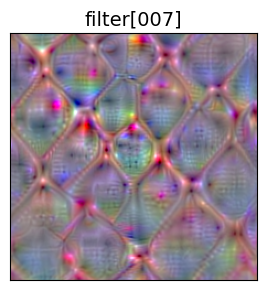

CPU times: user 12.1 s, sys: 153 ms, total: 12.2 s
Wall time: 12.2 s


In [ ]:
%%time
from tf_keras_vis.utils.callbacks import Print

# Generate max activation
activation = activation_maximization(loss, callbacks=[Print(interval=50)])
image = activation.numpy()[0].astype(np.uint8)

# Render
subplot_args = {'nrows':1, 'ncols':1, 'figsize':(3,3),
                'subplot_kw':{'xticks':[], 'yticks':[]}}

f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
plt.tight_layout()
plt.show()

**Visualizing multiple filters**

In [ ]:
filter_numbers = [63, 132, 320]

def loss(output):
  return (output[0, ..., 63], output[1, ..., 132], output[2, ..., 320])

In [ ]:
# Define seed inputs whose shape is (samples, height, width, channels)

seed_input = tf.random.uniform((3,224,224,3), 0, 255)

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[291.5876770019531, 249.124755859375, 359.6155090332031]],	Regularization: [('TotalVariation2D', [7.470424175262451, 7.0022196769714355, 7.780090808868408]), ('Norm', [38.15044403076172, 38.22015380859375, 38.28105545043945])]
Steps: 100	Scores: [[541.94580078125, 406.30194091796875, 525.7490234375]],	Regularization: [('TotalVariation2D', [9.605830192565918, 8.295295715332031, 9.265504837036133]), ('Norm', [38.328102111816406, 38.34952926635742, 38.5013542175293])]
Steps: 150	Scores: [[529.3578491210938, 371.91510009765625, 499.4504089355469]],	Regularization: [('TotalVariation2D', [9.148466110229492, 7.5147528648376465, 8.665820121765137]), ('Norm', [38.55108642578125, 38.509368896484375, 38.734954833984375])]
Steps: 200	Scores: [[608.362060546875, 417.80950927734375, 556.614990234375]],	Regularization: [('TotalVariation2D', [9.45877456665039, 7.703868865966797, 8.997932434082031]), ('Norm', [38.772056579589844, 38.62786102294922, 38.95778274536133])]


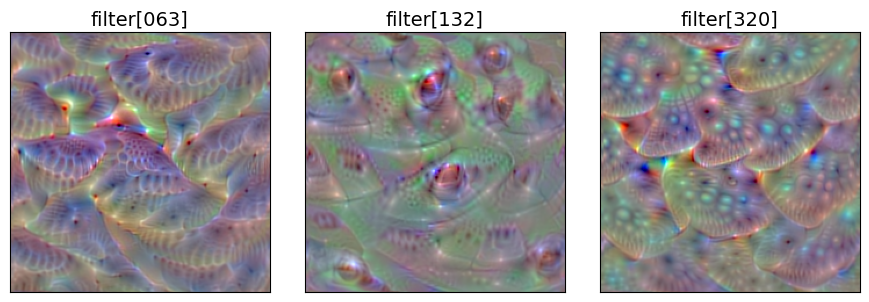

CPU times: user 25.6 s, sys: 311 ms, total: 25.9 s
Wall time: 26.4 s


In [ ]:
%%time
from tf_keras_vis.utils.callbacks import Print

# Generate max activation
activations = activation_maximization(loss, seed_input=seed_input, callbacks=[Print(interval=50)])
images = [activation.numpy().astype(np.uint8) for activation in activations]

# Render
subplot_args = {'nrows':1, 'ncols':3, 'figsize':(9,3),
                'subplot_kw':{'xticks':[], 'yticks':[]}}

f, ax = plt.subplots(**subplot_args)

for i, filter_number in enumerate(filter_numbers):
  ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
  ax[i].imshow(images[i])

plt.tight_layout()
plt.show()

**Class Maximization**
> Finding an input that maximizes a specific class of the VggNet

In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

from tensorflow.keras.applications.vgg16 import VGG16 as Model

model = Model(weights='imagenet', include_top=True)
model.summary()

1 GPUs
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)      

**Define function to modify the model**

In [ ]:
def model_modifier(m):
  m.layers[-1].activation = tf.keras.activations.linear

**Create ActivationMaximization inference**

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier, clone=False)

**Define Loss Function**

In [ ]:
def loss(output):
  return output[:, 20] #20th class

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[30.367568969726562]],	Regularization: [('TotalVariation2D', [3.998307704925537]), ('Norm', [38.2064323425293])]
Steps: 100	Scores: [[61.365272521972656]],	Regularization: [('TotalVariation2D', [4.181985855102539]), ('Norm', [38.14599609375])]
Steps: 150	Scores: [[101.29981994628906]],	Regularization: [('TotalVariation2D', [4.51347017288208]), ('Norm', [38.13043975830078])]
Steps: 200	Scores: [[112.43209838867188]],	Regularization: [('TotalVariation2D', [5.614861488342285]), ('Norm', [38.12742233276367])]


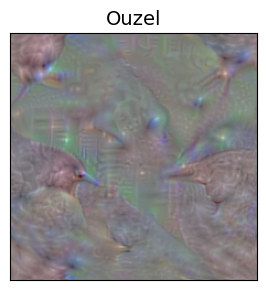

CPU times: user 13.7 s, sys: 153 ms, total: 13.8 s
Wall time: 14 s


In [ ]:
%%time
from tf_keras_vis.utils.callbacks import Print

# Generate max activation
activation = activation_maximization(loss, callbacks=[Print(interval=50)])
image = activation.numpy()[0].astype(np.uint8)

# Render
subplot_args = {'nrows':1, 'ncols':1, 'figsize':(3,3),
                'subplot_kw':{'xticks':[], 'yticks':[]}}

f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('Ouzel', fontsize=14) #Ouzel is a bird
plt.tight_layout()
plt.show()

**Doing the same for multiple classes**

In [ ]:
image_titles = ['Goldfish', 'Bear', 'Assault rifle']

def loss(output):
  return (output[0, 1], output[1, 294], output[2, 413])

In [ ]:
seed_input = tf.random.uniform((3,224,224,3), 0, 255)

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[144.2173309326172, 62.468536376953125, 38.48678207397461]],	Regularization: [('TotalVariation2D', [6.149415493011475, 4.612238883972168, 4.077410697937012]), ('Norm', [38.29399108886719, 38.13715362548828, 38.15793991088867])]
Steps: 100	Scores: [[214.5801544189453, 104.18045806884766, 90.2862319946289]],	Regularization: [('TotalVariation2D', [6.2839436531066895, 4.690166473388672, 4.396502494812012]), ('Norm', [38.36184310913086, 38.094818115234375, 38.104347229003906])]
Steps: 150	Scores: [[236.6748809814453, 139.3076629638672, 105.7119140625]],	Regularization: [('TotalVariation2D', [6.331171989440918, 4.967286586761475, 4.58297061920166]), ('Norm', [38.46135711669922, 38.09466552734375, 38.06660461425781])]
Steps: 200	Scores: [[258.7591247558594, 123.45249938964844, 86.71731567382812]],	Regularization: [('TotalVariation2D', [6.0492730140686035, 4.904660701751709, 4.074750900268555]), ('Norm', [38.522308349609375, 38.093109130859375, 38.02812957763672])]
Steps: 2

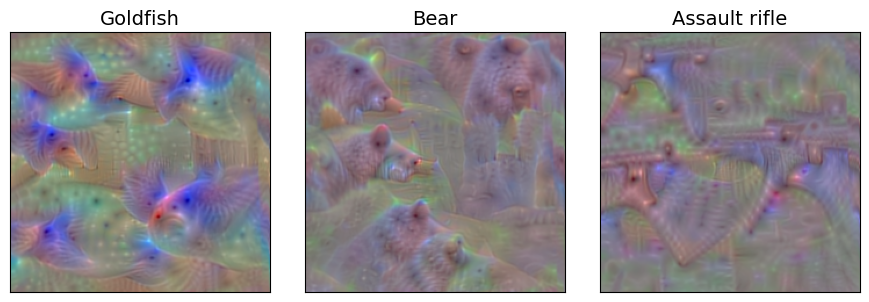

CPU times: user 1min 1s, sys: 416 ms, total: 1min 1s
Wall time: 1min 3s


In [ ]:
%%time
from tf_keras_vis.utils.callbacks import Print

# Generate max activation
activations = activation_maximization(loss, seed_input=seed_input, steps=512, callbacks=[Print(interval=50)])
images = [activation.numpy().astype(np.uint8) for activation in activations]

# Render
subplot_args = {'nrows':1, 'ncols':3, 'figsize':(9,3),
                'subplot_kw':{'xticks':[], 'yticks':[]}}

f, ax = plt.subplots(**subplot_args)

for i, title in enumerate(image_titles):
  ax[i].set_title(title, fontsize=14)
  ax[i].imshow(images[i])

plt.tight_layout()
plt.show()